# 라이브러리 불러오기

In [74]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
!pip install matplotlib

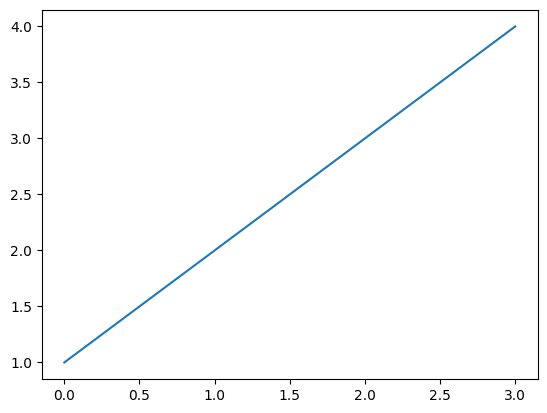

In [5]:
# 그래프 테스트
plt.plot([1,2,3,4])
plt.show()

In [7]:
# 특정 경로에 있는 csv 파일만 불러오기
path = "./search_file/"

In [8]:
# listdir 은 현재 경로에 있는 모든 파일을 확인
file_list = os.listdir(path) 

In [9]:
file_list

['test.py', '알리.csv', '중국쇼핑.csv', '테무.csv']

## 람다함수
['test.py', '알리.csv', '중국쇼핑.csv', '테무.csv']
여기에서 나는 확장자가 csv 파일만 가져오고 싶다. => 명령어 한줄로
1. 결과물 -> list []
2. 반복처리 -> for 문
for file in file_list:
  if file.endswith('.csv'):
    fileList.append(file)

In [11]:
# 디렉토리의 파일 중에서 csv 파일만 따로 배열로 처리 : 람다
fileList = []
for file in file_list:
    if file.endswith('.csv'):
        fileList.append(file)
fileList

['알리.csv', '중국쇼핑.csv', '테무.csv']

In [13]:
# 람다 함수
fileList1 = [file for file in file_list if file.endswith('.csv')]
fileList1

['알리.csv', '중국쇼핑.csv', '테무.csv']

In [14]:
# 판다스 파일 불러오기
df = pd.read_csv('./search_file/알리.csv')
df.head()

,제목,링크
0,알리익스프레스 배송,https://kin.naver.com/qna/detail.naver?d1id=8&...
1,알리직구 요산측정기 환산,https://kin.naver.com/qna/detail.naver?d1id=7&...
2,알리 배송조회,https://kin.naver.com/qna/detail.naver?d1id=8&...
3,알리 배송,https://kin.naver.com/qna/detail.naver?d1id=5&...
4,"위챗,알리 페이 한국에서 송금 받을때",https://kin.naver.com/qna/detail.naver?d1id=9&...


In [19]:
#  배열의 여러 csv 파일을 자동 병합해서 하나의 df 파일로 만드는 처리
dfCsv = pd.DataFrame()
for i in fileList1:
    data = pd.read_csv(path + i, encoding='utf-8')
    dfCsv = pd.concat([dfCsv,data])

dfCsv = dfCsv.reset_index(drop=True)

In [20]:
dfCsv

,제목,링크
0,알리익스프레스 배송,https://kin.naver.com/qna/detail.naver?d1id=8&...
1,알리직구 요산측정기 환산,https://kin.naver.com/qna/detail.naver?d1id=7&...
2,알리 배송조회,https://kin.naver.com/qna/detail.naver?d1id=8&...
3,알리 배송,https://kin.naver.com/qna/detail.naver?d1id=5&...
4,"위챗,알리 페이 한국에서 송금 받을때",https://kin.naver.com/qna/detail.naver?d1id=9&...
...,...,...
2995,테무 신규 궁금 한점 (내공 30,https://kin.naver.com/qna/detail.naver?d1id=1&...
2996,테무 배송이 언제올까요?,https://kin.naver.com/qna/detail.naver?d1id=8&...
2997,테무 목적항 도착.. 언제올까요 ? ㅠ,https://kin.naver.com/qna/detail.naver?d1id=8&...
2998,테무 배송 조회,https://kin.naver.com/qna/detail.naver?d1id=8&...


In [21]:
dfCsv.shape

(3000, 2)

## dafaframe의 첫부분

<순서>
1. 데이터 수집
2. 데이터를 사용할 수 있도록 하나의 변수로 처리 
여러개 -> 1개의 변수
3. 불필요한 데이터를 제거, 필요한 데이터를 추가, pandas 특정 컬럼을 삭제(drop)

In [22]:
# dataframe에서 링크를 제거 (drop)
dfCsv = dfCsv.drop(['링크'], axis='columns')

In [23]:
dfCsv.head()

,제목
0,알리익스프레스 배송
1,알리직구 요산측정기 환산
2,알리 배송조회
3,알리 배송
4,"위챗,알리 페이 한국에서 송금 받을때"


In [24]:
# pandas 형식 -> list
listCsv = dfCsv['제목'].astype(str).tolist()

In [25]:
listCsv

['알리익스프레스 배송',
 '알리직구 요산측정기 환산',
 '알리 배송조회',
 '알리 배송',
 '위챗,알리 페이 한국에서 송금 받을때',
 '태국에 알리익스프레스',
 '알리 에어브러쉬 이거 모에요',
 '알리 수입 사용소비 심사진행',
 '알리익스프레스 베이스',
 '알리 배송 수입통관',
 '알리 사업자통관',
 '알리 택배 배송 조회 해주세요 ㅠ',
 '알리페이 질문드립니다.',
 '알리 배송 언제 올까요?',
 '알리 반품',
 '알리 배송',
 '알리페이에 있는 돈을 카카오페이로',
 '알리익스프레스 배송',
 '알리 588227641623',
 '알리 어플 환불. 다시 포장해서 보내야... ',
 '알리페이, 알리페이 플러스',
 '알리익스프레스 배송조회',
 '알리 배송 언제올까요?',
 '알리 언제 올까요ㅜㅜ',
 '알리 이코노미 배송 언제올까요',
 '알리 배송 추적',
 '알리페이 유니온페이카드 급해요ㅠ',
 '알리 우체국 조회',
 '알리익스프레스 배송',
 '알리 익스프레스 주문 배송업데이트 메일',
 '알리 택배 언제올까요?',
 '알리 배송 언제 올까요?',
 '알리익스프레스 배송 언제 될까요?',
 '알리,위챗페이',
 '알리익스프레스 장바구니',
 '알리익스프레스 배송',
 '알리 배송 조회좀 해주세요',
 '알리익스프레스 배송질문',
 '알리익스프레스 택배 배송 언제 올까요??',
 '알리익스프레스 배송조회',
 '알리익스프레스 배송조회',
 '알리익스프레스 주문오류',
 '알리에서 시켰는데',
 '알리배송 올까요???',
 '알리 택배 언제 올까요 누락된걸까요??',
 '알리익스프레스 배송지변경',
 '알리익스프레스 배송상태가 1달째... ',
 '알리 택배',
 '알리페이 결제 본토인증?',
 '알리 계류장 도착 배송',
 '알리 환불',
 '알리 배송 멈춤',
 '알리 택배 조회',
 '알리배송 알고싶어요',
 '알리익스프레스 588270897283',
 '알리 배송이 언제될까요?',
 '알리익스프레스 배송 조회',
 

# 워드클라우드 작업

In [26]:
# 리스트 문자열을 하나의 문자열로 만드는 방법
wordStr = ' '.join(listCsv)

In [27]:
wordStr

'알리익스프레스 배송 알리직구 요산측정기 환산 알리 배송조회 알리 배송 위챗,알리 페이 한국에서 송금 받을때 태국에 알리익스프레스 알리 에어브러쉬 이거 모에요 알리 수입 사용소비 심사진행 알리익스프레스 베이스 알리 배송 수입통관 알리 사업자통관 알리 택배 배송 조회 해주세요 ㅠ 알리페이 질문드립니다. 알리 배송 언제 올까요? 알리 반품 알리 배송 알리페이에 있는 돈을 카카오페이로 알리익스프레스 배송 알리 588227641623 알리 어플 환불. 다시 포장해서 보내야...  알리페이, 알리페이 플러스 알리익스프레스 배송조회 알리 배송 언제올까요? 알리 언제 올까요ㅜㅜ 알리 이코노미 배송 언제올까요 알리 배송 추적 알리페이 유니온페이카드 급해요ㅠ 알리 우체국 조회 알리익스프레스 배송 알리 익스프레스 주문 배송업데이트 메일 알리 택배 언제올까요? 알리 배송 언제 올까요? 알리익스프레스 배송 언제 될까요? 알리,위챗페이 알리익스프레스 장바구니 알리익스프레스 배송 알리 배송 조회좀 해주세요 알리익스프레스 배송질문 알리익스프레스 택배 배송 언제 올까요?? 알리익스프레스 배송조회 알리익스프레스 배송조회 알리익스프레스 주문오류 알리에서 시켰는데 알리배송 올까요??? 알리 택배 언제 올까요 누락된걸까요?? 알리익스프레스 배송지변경 알리익스프레스 배송상태가 1달째...  알리 택배 알리페이 결제 본토인증? 알리 계류장 도착 배송 알리 환불 알리 배송 멈춤 알리 택배 조회 알리배송 알고싶어요 알리익스프레스 588270897283 알리 배송이 언제될까요? 알리익스프레스 배송 조회 알리 배송조회 알리 배송조회 알리 배송 언제 올까요??ㅠ 알리 배송중 전화번호 변경 알리페이 오류가 나요 도와주세요.. 알리익스프레스 배송 관련 알리 배송 언제 올까요 알리익스프레스 택배 알리 UT461388338TW 알리익스프레스 배송 알리 5일배송 알리 배송지 수입통관 이상보고 알리 배송 언제올까요 알리 배송 언제올까요??? 혹시 사진에 이 배터리는 알리제품인가요?? 알리 이코노미 배송 알리 배송 관련

### 정규화(RE)

In [28]:
# a와 c사이에 어떤 문자가 와도 된다. '.'은 중간에 어떤 문자가 와도 된다는 의미
r_1 = re.compile("a.c")

In [29]:
r_1.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [31]:
# 매치가 안돼면 값이 안나옴
r_1.search("abbc")

In [33]:
r_2 = re.compile("a?c")

In [34]:
r_2.search("azc")

<re.Match object; span=(2, 3), match='c'>

In [35]:
# * : 문자가 여러개 있을 수 있음
r_3 = re.compile("a*c")

In [37]:
r_3.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [40]:
r_3.search("asdfaawerfcqawc")

<re.Match object; span=(10, 11), match='c'>

In [44]:
# + : 더하기 앞의 단어가 존재해야함
r_4 = re.compile("ab+c")

In [45]:
r_4.search("ac")

In [47]:
# ^ : 특정 문자로 시작
r_5 = re.compile("^c")

In [49]:
r_5.search("ac")

In [50]:
r_5.search("cable")

<re.Match object; span=(0, 1), match='c'>

In [51]:
# {} : 안에 있는 숫자만큼 반복
r_6 = re.compile("ab{2}c")

In [53]:
r_6.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [54]:
# {시작,끝} : 시작~끝 사이의 숫자이면 됨
r_7 = re.compile("ab{2,4}c")

In [56]:
r_7.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [57]:
# {시작,} : 시작 범위만 있으면 됨

In [58]:
r_8 = re.compile("ab{2,}c")

In [59]:
r_8.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [61]:
r_9 = re.compile("ab{,4}c")

In [62]:
# [] : 범위 중 하나

In [63]:
r_10 = re.compile("[abcd]") 

In [64]:
r_10.search("zzz")

In [ ]:
# [a-z] : 소문자만 인식

In [65]:
r_11 = re.compile("[a-z]")

In [66]:
r_11.search("fdfz")

<re.Match object; span=(0, 1), match='f'>

In [67]:
# 핸드폰 번호
reHand = re.compile('\d{2,3}-\d{3,4}-\d{4}')

In [68]:
reHand.search("010-7777-2222")

<re.Match object; span=(0, 13), match='010-7777-2222'>

In [ ]:
# 글자, 한글 제외한 모든 단어 삭제

In [75]:
def clean_text(inputString):
    text_rmv = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’\'·]', ' ', inputString)
    return text_rmv

In [94]:
wc1 = WordCloud(
    font_path = "c:Windows\fonts\malgun.ttf",
    stopwords = ["알리익스프레스", "알리", "익스프레스", "테무", "쇼핑몰"],
    background_color = 'white',
    width = 1200,
    height = 1100,
    random_state = 40,
)

In [95]:
# 워드 클라우드에 우리가 생성한 단어를 적용
wc1.generate(wordStr)

In [97]:
# 이미지로 저장
wc1.to_file("ali.png")

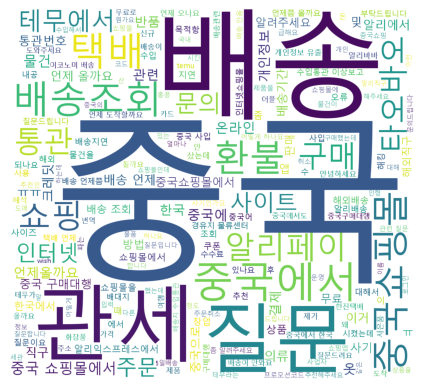

In [96]:
# matplotlib 에서 보여주기
plt.figure(figure=(10,8))
plt.axis('off')
plt.imshow(wc1)
plt.show()